결측치 개수:
 buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
label       0
dtype: int64

클래스 분포 (변환 후):
 label
2    1210
0     384
1      69
3      65
Name: count, dtype: int64

Random Forest Accuracy: 0.9740


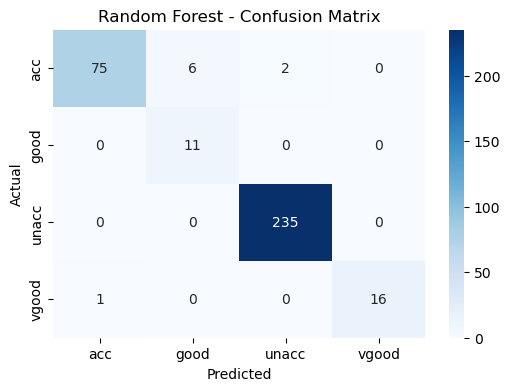


Decision Tree Accuracy: 0.9740


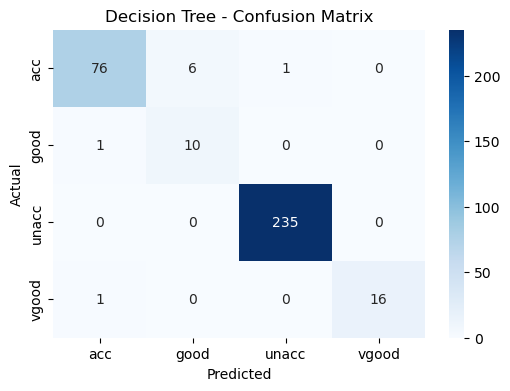


Logistic Regression Accuracy: 0.6590


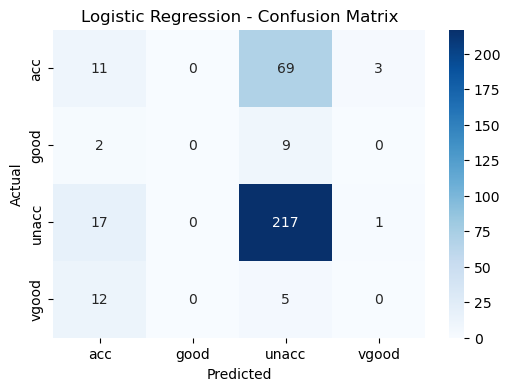


K-Nearest Neighbors Accuracy: 0.8873


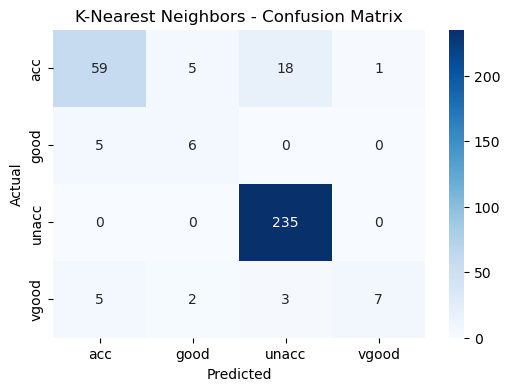


Support Vector Machine Accuracy: 0.9133


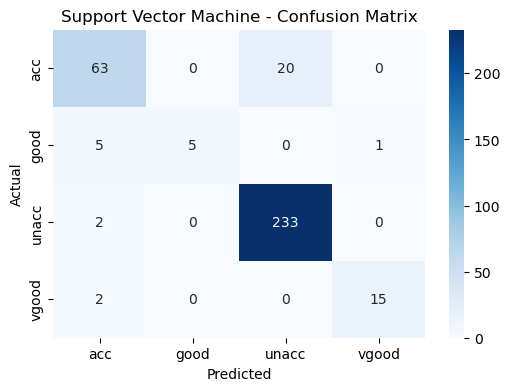

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# 데이터 로딩
file_path = "C:/Users/dudnj/Gachon/4-2/AI/Week_03/database/car_evaluation.csv"
df = pd.read_csv(file_path, header=None)

# 컬럼명 추가
df.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "label"]

# 1. 결측치 확인 및 제거
print("결측치 개수:\n", df.isnull().sum())

# 2. 모든 값이 존재하므로 결측치 제거 과정 생략

# 3. 범주형 데이터를 숫자로 변환
label_encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 4. 클래스 분포 확인 (변환 후)
print("\n클래스 분포 (변환 후):\n", df["label"].value_counts())

# 5. 데이터 분할
X = df.drop(columns=["label"])
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. 모델 학습 및 평가
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=5000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = (acc, confusion_matrix(y_test, y_pred))

# 7. 결과 출력
for name, (acc, cm) in results.items():
    print(f"\n{name} Accuracy: {acc:.4f}")
    
    # Confusion Matrix 시각화
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoders["label"].classes_, yticklabels=label_encoders["label"].classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()
